<a href="https://colab.research.google.com/github/kaushikpatriot/ML-Work/blob/main/FinalSubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
def warn(*args, **kwargs):
  pass

warnings.warn = warn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class MeanEncoder(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.initiated = True
    #return self

  def fit(self, X, y):
    self.mean_encode = {}
    train_mean = pd.DataFrame(X.copy())
    train_mean['Offer Accepted'] = y.copy()
    for feature in train_mean.columns:
      self.mean_encode[feature] = train_mean.groupby(feature)['Offer Accepted'].mean()#.round(3)
    return self

  def transform(self, X):
    X_new = pd.DataFrame(X.copy())
    for feature in X_new.columns:
      X_new.loc[:, feature] = X_new[feature].map(self.mean_encode[feature])
    return X_new

In [ ]:
model.train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   offer expiration                      12379 non-null  int64  
 1   income_range                          12379 non-null  int64  
 2   no_visited_Cold drinks                12181 non-null  float64
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64  
 4   Restaur_spend_less_than20             12258 non-null  float64
 5   Marital Status                        12379 non-null  int64  
 6   restaurant type                       12379 non-null  int64  
 7   age                                   12379 non-null  int64  
 8   Prefer western over chinese           12379 non-null  int64  
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64  
 10  no_visited_bars                       12286 non-null  float64
 11  gender         

In [ ]:
class train_model():
  def __init__(self):
    train_path = '/content/drive/MyDrive/Colab Notebooks/MLP-Code/Project/train_data.csv'
    self.train_df = pd.read_csv(train_path)
    test_path = '/content/drive/MyDrive/Colab Notebooks/MLP-Code/Project/test_data.csv'
    self.test_df = pd.read_csv(test_path)
    drop_list = ['car','travelled_more_than_5mins_for_offer']
    self.train_df.drop(drop_list, axis = 1, inplace=True)
    self.test_df.drop(drop_list, axis = 1, inplace=True)
    self.random_state = 42


  def custom_encoding(self):
    #Dictionary for encoding
    self.custom_encoding_dict = {'offer expiration': {'2days':48, '10hours':10},
                    'income_range': {'₹100000 or More': 100000, '₹87500 - ₹99999': 87500, '₹37500 - ₹49999': 37500, 'Less than ₹12500': 5000, '₹50000 - ₹62499': 50000,
                                      '₹12500 - ₹24999': 12500, '₹75000 - ₹87499': 75000, '₹25000 - ₹37499': 25000, '₹62500 - ₹74999': 62500},
                    'no_visited_Cold drinks': {'4~8':3,'less1':1, 'never':0, '1~3':2, 'gt8': 4},
                    'Restaur_spend_less_than20': {'less1':1, '4~8':3, '1~3':2, 'gt8':4, 'never': 0},
                    'age': {'36':36, '50plus':50, '26':26, '46':46, '21':21, 'below21':18, '41':41, '31':31},
                    'no_visited_bars': {'less1':1, 'never':0, '1~3':2, '4~8':3, 'gt8':4},
                    'Qualification': {'Bachelors degree': 3,  'Some college - no degree': 2, 'Graduate degree (Masters or Doctorate)': 5, 'Associates degree': 4,
                                      'High School Graduate': 1, 'Some High School': 0 },
                    'no_Take-aways': {'less1':1, 'never':0, '1~3':2, '4~8':3, 'gt8':4},
                    'Restaur_spend_greater_than20': {'less1':1, 'never':0, '1~3':2, '4~8':3, 'gt8':4},
                    }

    self.label_encoding_list = ['Marital Status', 'gender' , 'Customer type', 'Job/Job Industry', 'Climate' ,'drop location','restaurant type']
    self.no_encoding_list = ['travelled_more_than_15mins_for_offer', 'Prefer western over chinese','travelled_more_than_25mins_for_offer', 'restuarant_same_direction_house',
                    'Cooks regularly', 'is foodie','restuarant_opposite_direction_house', 'has Children','visit restaurant with rating (avg)', 'temperature', 'Travel Time', 'Prefer home food' ]
    self.numeric_list = ['income_range', 'age', 'offer expiration']
    self.numeric_list_code = [0,1,7, 2, 4, 10, 15, 17, 23 ]
    self.one_hot_encoding_list = ['Marital Status', 'gender' , 'Customer type', 'Job/Job Industry', 'Climate' ,'drop location','restaurant type', 'Qualification']
    self.ohe_list_code = [5,11,14,18,25,26,6,15]

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    #Custom encoding certain fields
    self.train_enc = self.train_df.copy()
    self.test_enc = self.test_df.copy()
    for feature in self.custom_encoding_dict.keys():
        if (feature in self.train_df.columns):
          self.train_enc[feature] = self.train_df[feature].map(self.custom_encoding_dict[feature])
          self.test_enc[feature] = self.test_df[feature].map(self.custom_encoding_dict[feature])

    #Label encoding certain fields
    for feature in self.label_encoding_list:
      if (feature in self.train_df.columns):
        self.train_enc[feature] = le.fit_transform(self.train_enc.loc[:, feature])
        self.test_enc[feature] = le.transform(self.test_enc.loc[:, feature])

    self.train_enc['Offer Accepted'] = le.fit_transform(self.train_enc.loc[:, 'Offer Accepted'])

    #Splitting features and Labels
    self.train_X = self.train_enc.iloc[:, :-1]
    self.train_y = self.train_enc.iloc[:, -1]
    self.test_X = self.test_enc

  def imputeAndCluster(self, cluster = False):
    from sklearn.impute import KNNImputer
    from sklearn.cluster import KMeans
    knn = KNNImputer(n_neighbors = 1)
    self.train_X_imp = pd.DataFrame(knn.fit_transform(self.train_X), columns = self.train_X.columns)
    self.test_X_imp = pd.DataFrame(knn.transform(self.test_X), columns = self.test_X.columns)
    if (cluster):
      kmeans = KMeans(n_clusters = 9, random_state = 42)
      self.train_X_imp['cluster'] = kmeans.fit_predict(self.train_X_imp)
      self.test_X_imp['cluster'] = kmeans.predict(self.test_X_imp)

  def genNewFeatures(self):
      foodPrefList = ['no_visited_Cold drinks', 'restaurant type',  'Prefer western over chinese',  'no_visited_bars',  'is foodie',
                      'no_Take-aways',  'visit restaurant with rating (avg)',  'Prefer home food']
      customerTypeList= [ 'Marital Status',  'gender',  'Cooks regularly',  'Customer type',  'has Children', 'age']
      spendBehaviourList = [ 'Restaur_spend_less_than20',  'Restaur_spend_greater_than20']
      distanceList = [ 'travelled_more_than_15mins_for_offer',  'travelled_more_than_25mins_for_offer', 'restuarant_same_direction_house',
                       'restuarant_opposite_direction_house', 'Travel Time', 'drop location']
      self.train_X_imp['visitScore'] = self.train_X_imp['no_visited_Cold drinks'] * self.train_X_imp['no_visited_bars'] * self.train_X_imp['no_Take-aways']
      self.train_X_imp['foodPrefScore'] =  self.train_X_imp['restaurant type'] * self.train_X_imp['Prefer western over chinese'] * self.train_X_imp['Prefer home food'] * self.train_X_imp['visit restaurant with rating (avg)']
      self.train_X_imp['distanceScore'] = self.train_X_imp['travelled_more_than_15mins_for_offer'] * self.train_X_imp['travelled_more_than_25mins_for_offer'] * self.train_X_imp['restuarant_same_direction_house'] * self.train_X_imp['restuarant_opposite_direction_house'] + self.train_X_imp['Travel Time'] * self.train_X_imp['drop location']
      self.train_X_imp['custTypeScore'] = self.train_X_imp['Marital Status'] * self.train_X_imp['gender'] * self.train_X_imp['Cooks regularly'] * self.train_X_imp['Customer type'] * self.train_X_imp['has Children'] * self.train_X_imp['age']




In [ ]:
def gen_submission_file(label_pred , name):
  f = open(f'submissions_{name}.csv', "w")
  f.write('id' + ',' + 'Offer Accepted\n')
  for i in range(len(label_pred)):
    if (label_pred[i] == 0):
      f.write(str(i) + ',' + 'No\n')
    else:
      f.write(str(i) + ',' + 'Yes\n')
  f.close()

#Libraries

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from sklearn.cluster import KMeans

# Data Analysis

In [ ]:
model = train_model()
model.custom_encoding()
model.train_X.isnull().sum()

offer expiration                          0
income_range                              0
no_visited_Cold drinks                  198
travelled_more_than_15mins_for_offer      0
Restaur_spend_less_than20               121
Marital Status                            0
restaurant type                           0
age                                       0
Prefer western over chinese               0
travelled_more_than_25mins_for_offer      0
no_visited_bars                          93
gender                                    0
restuarant_same_direction_house           0
Cooks regularly                           0
Customer type                             0
Qualification                             0
is foodie                                 0
no_Take-aways                           144
Job/Job Industry                          0
restuarant_opposite_direction_house       0
has Children                              0
visit restaurant with rating (avg)        0
temperature                     

#Random Forest

## SMOTE - Standard Scaler with Mean Encoding

###Model Set up

In [ ]:
#Initial Set up and basic encoding
model = train_model()
model.custom_encoding()

#Set up pipeline
ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code),
                                             ('MeanEncoder', MeanEncoder(), model.ohe_list_code)], remainder = MeanEncoder())

#ct_trgt = ColumnTransformer(transformers = [('MeanEncoder', MeanEncoder(), slice(0,27))], remainder = 'passthrough')

#ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code)], remainder = OneHotEncoder())

pipe = imbpipeline(steps = [
                                ('impute', KNNImputer(n_neighbors = 1)), #SimpleImputer(strategy = 'most_frequent'),
                                ('sample', SMOTE(random_state = 64)), #
                                ('transform', ct_trgt),
                                ('rf', RandomForestClassifier(random_state=64))
                                ])
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(model.train_X, model.train_y, test_size = 0.2, random_state=64,)
print(X_train.shape, y_train.shape)




(9903, 28) (9903,)


###With Clustering - Type 1

In [ ]:
#Initial Set up and basic encoding
model = train_model()
model.custom_encoding()
model.imputeAndCluster(cluster = True)

#Set up pipeline
#ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code),
#                                            ('passthrough', 'passthrough', ['cluster'])],remainder = MeanEncoder())


ct_trgt = ColumnTransformer(transformers = [('passthrough', 'passthrough', ['cluster'])],remainder = StandardScaler())

#ct_trgt = ColumnTransformer(transformers = [('passthrough', 'passthrough', ['cluster'])],remainder = MeanEncoder())

#ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code)], remainder = OneHotEncoder())

pipe = imbpipeline(steps = [
                                #('impute', KNNImputer(n_neighbors = 1)), #SimpleImputer(strategy = 'most_frequent'),
                                #('sample', SMOTE(random_state = 43)), #
                                ('transform', ct_trgt),
                                ('rf', RandomForestClassifier(random_state=42))
                                ])
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(model.train_X_imp, model.train_y, test_size = 0.2, random_state=42)
print(X_train.shape, y_train.shape)

(9903, 29) (9903,)


###With Clustering - Type 2

In [ ]:
#Initial Set up and basic encoding
model = train_model()
model.custom_encoding()
model.knnImpute()
model.clusterData(multi=True)

#Set up pipeline
ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code),
                                            ('passthrough', 'passthrough', ['overall','custType', 'distance'])],remainder = MeanEncoder())

#ct_trgt = ColumnTransformer(transformers = [('passthrough', 'passthrough', ['cluster'])],remainder = MeanEncoder())

#ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code)], remainder = OneHotEncoder())

pipe = imbpipeline(steps = [
                                #('impute', KNNImputer(n_neighbors = 1)), #SimpleImputer(strategy = 'most_frequent'),
                                ('sample', SMOTE(random_state = 43)), #
                                ('transform', ct_trgt),
                                ('poly', PolynomialFeatures(degree=2, interaction_only = True)),
                                ('rf', RandomForestClassifier(random_state=42,))
                                ])
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(model.train_X_imp, model.train_y, test_size = 0.2, random_state=42,)
print(X_train.shape, y_train.shape)

(9903, 31) (9903,)


In [ ]:
X_train.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,overall,custType,distance
1691,48.0,37500.0,0.0,1.0,2.0,2.0,1.0,36.0,0.0,0.0,...,1.0,89.0,1.0,22.0,1.0,1.0,0.0,4,0,2
8979,48.0,25000.0,3.0,0.0,2.0,3.0,1.0,26.0,1.0,0.0,...,4.0,67.0,1.0,22.0,0.0,1.0,0.0,0,3,2
123,10.0,37500.0,0.0,1.0,3.0,1.0,4.0,31.0,0.0,0.0,...,3.0,89.0,2.0,10.0,0.0,0.0,1.0,4,4,4
7038,10.0,50000.0,2.0,0.0,2.0,1.0,3.0,21.0,1.0,0.0,...,4.0,67.0,2.0,7.0,1.0,2.0,1.0,5,1,0
1952,10.0,50000.0,1.0,1.0,2.0,1.0,2.0,26.0,0.0,0.0,...,2.0,40.0,2.0,18.0,1.0,1.0,0.0,5,3,1


##GridSearch

0.6175613425698167
{'rf__n_estimators': 1000, 'rf__min_samples_split': 8, 'rf__min_samples_leaf': 2, 'rf__min_impurity_decrease': 0.0, 'rf__max_leaf_nodes': None, 'rf__max_features': 'auto', 'rf__max_depth': 40, 'rf__criterion': 'entropy', 'rf__class_weight': {0: 0.6, 1: 0.4}, 'rf__bootstrap': True}
{'mean_fit_time': array([12.48723435, 11.15797019,  9.78815484,  3.77158467, 11.26009146,
        5.87514528,  5.70777599, 11.09901031, 10.23613071, 10.05600309,
       11.24840403,  3.42024652,  6.20044533, 11.55555582, 10.48661184,
        3.77718488,  4.15024567,  3.43139696, 12.13670945,  9.50496062,
        5.10442138, 12.00059239, 10.90153098,  3.55607239,  3.74290903,
       11.34044131, 12.31781729, 11.80968857,  6.01030437, 10.99690064,
        5.1556805 , 10.50424234,  6.21462083,  5.1443483 ,  6.24909941,
       11.06748438, 12.43726905, 11.39953621,  6.21404227,  3.7683839 ,
        3.45961428,  6.30950824,  5.96109589,  4.03031762,  9.69646994,
        4.32724643, 12.82240176, 

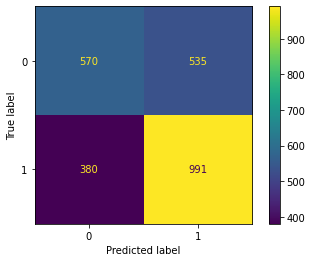

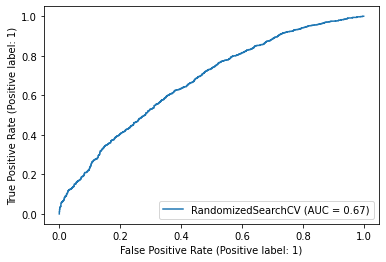

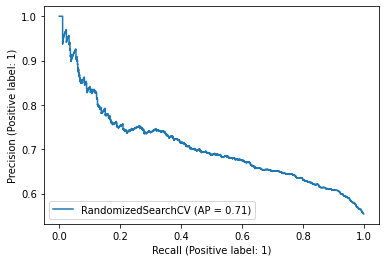

In [ ]:
#GridSearch set up
#params = {'rf__n_estimators':[800], 'rf__criterion': ['entropy'], 'rf__max_depth': [10], 'rf__min_samples_split': [i for i in range(500)],
#          'rf__min_samples_leaf': [2], 'rf__min_impurity_decrease': [0.0]}

params = {'rf__bootstrap': [True],
          'rf__max_depth': [35, 40, 45],
          'rf__max_features': ['auto'],
          'rf__min_samples_leaf': [2],
          'rf__min_samples_split': [8, 9, 10],
          'rf__n_estimators': [850, 900, 950, 1000, 1050, 1100],
          'rf__max_leaf_nodes': [None],
          'rf__class_weight': [{0:0.6, 1:0.4}],
          'rf__criterion': ['entropy'],
          'rf__min_impurity_decrease': [0.0, 0.01, 0.001, 0.0001]}

#sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
skf = StratifiedKFold(n_splits = 3,shuffle=True,random_state = 42)
rf_gs = RandomizedSearchCV(estimator = pipe, param_distributions = params, scoring = 'f1_weighted', n_iter = 100, cv = skf, random_state = 42, return_train_score=True )

#Cross fold training
rf_gs.fit(X_train, y_train)

# Metrics display
print(rf_gs.best_score_)
print(rf_gs.best_params_)
print(rf_gs.cv_results_)
print('----------------------------------------------------')
print(rf_gs.score(X_test, y_test))
y_pred = rf_gs.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(rf_gs, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(rf_gs, X_test, y_test, pos_label = 1)
plt.show()



In [ ]:
#GridSearch set up
#params = {'rf__n_estimators':[800], 'rf__criterion': ['entropy'], 'rf__max_depth': [10], 'rf__min_samples_split': [i for i in range(500)],
#          'rf__min_samples_leaf': [2], 'rf__min_impurity_decrease': [0.0]}

params = {'rf__bootstrap': [True, False],
          'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
          'rf__max_features': ['auto', 'sqrt', None],
          'rf__min_samples_leaf': [1, 2, 4],
          'rf__min_samples_split': [2, 5, 10],
          'rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
          'rf__max_leaf_nodes': [None, 2, 4 , 8, 10],
          'rf__class_weight': [None, {0:0.5,1:0.5}, {0:0.6, 1:0.4}],
          'rf__criterion': ['entropy', 'gini']}


#sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
skf = StratifiedKFold(n_splits = 3,shuffle=True,random_state = 42)
rf_gs = RandomizedSearchCV(estimator = pipe, param_distributions = params, n_iter = 100, scoring = 'f1', cv = skf, random_state = 42, return_train_score=True )

#Cross fold training
rf_gs.fit(X_train, y_train)

# Metrics display
print(rf_gs.best_score_)
print(rf_gs.best_params_)
print(rf_gs.cv_results_)
print('----------------------------------------------------')
print(rf_gs.score(X_test, y_test))
y_pred = rf_gs.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(rf_gs, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(rf_gs, X_test, y_test, pos_label = 1)
plt.show()



0.6188517636591632
{'rf__bootstrap': True, 'rf__class_weight': {0: 0.6, 1: 0.4}, 'rf__criterion': 'entropy', 'rf__max_depth': 30, 'rf__max_features': 'auto', 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 7, 'rf__n_estimators': 900}
{'mean_fit_time': array([10.86374275, 11.54356154, 12.47796098, 12.80114102, 13.59267775,
       10.17940021, 10.77633127, 11.77580341, 11.55583747, 12.71216138,
        9.48988914, 10.08487304, 10.25860469, 11.19845581, 11.7441291 ,
        9.49283934,  9.37343256, 11.42861915, 10.85201295, 10.82172171,
        8.58739575,  8.97504258, 10.02682257, 10.42002734, 10.35150679,
        9.86144018, 10.69561537, 10.75469136, 11.81180223, 11.96135298,
        9.75547751,  9.98606809, 10.55000178, 11.04837799, 12.35281475,
        9.01163944,  9.54390343,  9.89603209, 10.91189019, 11.33818062,
        8.7705191 ,  9.16733543,  9.53427052, 10.51735775, 10.43329382,
        8.67905045,  8.77025978,  9.12014445, 10.02142056, 10.379049

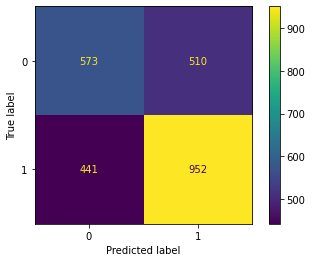

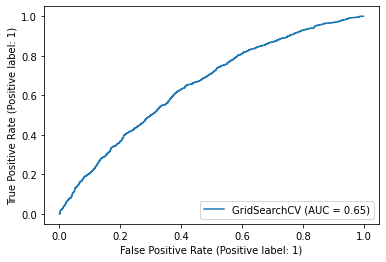

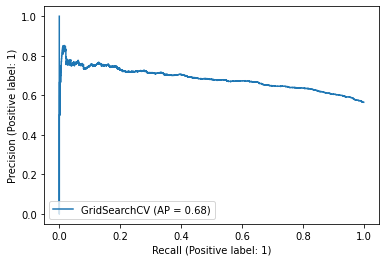

In [ ]:
params = {'rf__n_estimators': [900, 950, 1000, 1050, 1100],
          'rf__min_samples_split': [5, 7, 10, 12, 15],
          'rf__min_samples_leaf': [2,3,4,5],
          'rf__max_leaf_nodes': [None],
          'rf__max_features': ['auto'],
          'rf__max_depth': [30,35, 40, 45, 50],
          'rf__criterion': ['entropy'],
          'rf__class_weight': [{0: 0.6, 1: 0.4}],
          'rf__bootstrap': [True]}

# {'rf__n_estimators': 1000,
#  'rf__min_samples_split': 10,
#  'rf__min_samples_leaf': 2,
#  'rf__max_leaf_nodes': None,
#  'rf__max_features': 'auto',
#  'rf__max_depth': 40,
#  'rf__criterion': 'entropy',
#  'rf__class_weight': {0: 0.6, 1: 0.4},
#  'rf__bootstrap': True}


#GridSearch set up
#params = {'rf__n_estimators':[800], 'rf__criterion': ['entropy'], 'rf__max_depth': [10], 'rf__min_samples_split': [i for i in range(500)],
#          'rf__min_samples_leaf': [2], 'rf__min_impurity_decrease': [0.0]}

#sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
skf = StratifiedKFold(n_splits = 3,shuffle=True,random_state = 42)
rf_gs = GridSearchCV(estimator = pipe, param_grid = params, scoring = 'f1_weighted', cv = skf, return_train_score=True ,)

#Cross fold training
rf_gs.fit(X_train, y_train)

# Metrics display
print(rf_gs.best_score_)
print(rf_gs.best_params_)
print(rf_gs.cv_results_)
print('----------------------------------------------------')
print(rf_gs.score(X_test, y_test))
y_pred = rf_gs.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(rf_gs, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(rf_gs, X_test, y_test, pos_label = 1)
plt.show()




##Evaluating on the Test Data set

Training -  (9903, 29) (9903,)
29
Testing -  (9903, 29) (9903,)
0.9900030293850348
0.627221324717286
              precision    recall  f1-score   support

           0       0.59      0.54      0.56      1105
           1       0.65      0.70      0.68      1371

    accuracy                           0.63      2476
   macro avg       0.62      0.62      0.62      2476
weighted avg       0.62      0.63      0.62      2476



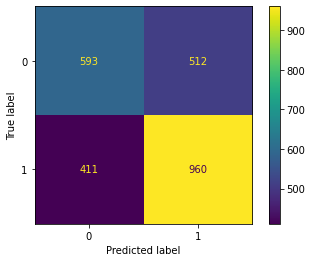

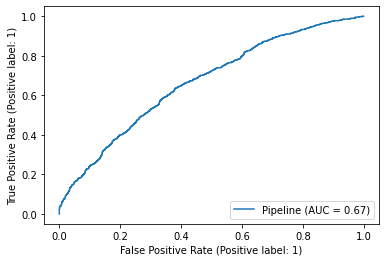

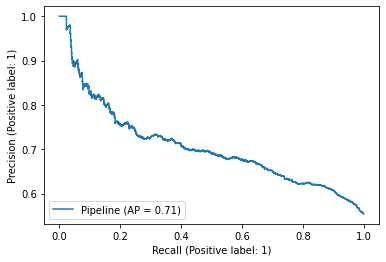

In [ ]:
# final_params = {'rf__n_estimators': 1000,
#                 'rf__min_samples_split': 8,
#                 'rf__min_samples_leaf': 2,
#                 'rf__min_impurity_decrease': 0.0,
#                 'rf__max_leaf_nodes': None,
#                 'rf__max_features': 'auto',
#                 'rf__max_depth': 40,
#                 'rf__criterion': 'entropy',
#                 'rf__class_weight': {0: 0.6, 1: 0.4},
#                 'rf__bootstrap': True}


# Best Params - SMOTE, Clustering(9 clusters), Mixed Encoding
final_params = {'rf__bootstrap': True,
                'rf__class_weight': {0: 0.62, 1: 0.38},
                'rf__criterion': 'entropy',
                'rf__max_depth': 32,
                'rf__max_features': 'auto',
                'rf__max_leaf_nodes': None,
                'rf__min_samples_leaf': 3,
                'rf__min_samples_split': 7,
                'rf__n_estimators': 1000}

pipe.set_params(**final_params)
print('Training - ', X_train.shape, y_train.shape)
pipe.fit(X_train, y_train)
print(pipe[-1].n_features_in_)
# Metrics display
print('Testing - ',X_train.shape, y_train.shape)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(pipe, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(pipe, X_test, y_test, pos_label = 1)
plt.show()

##Training on the whole data set and prediction

In [ ]:
final_pred = pipe.predict(model.test_X_imp)
gen_submission_file(final_pred, 'rf-121222-4')

#Gradient Boosting

## SMOTE - Standard Scaler with Mean Encoding

###Model Set up

###Plain

In [ ]:
#Initial Set up and basic encoding
model = train_model()
model.custom_encoding()

#Set up pipeline
ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code),
                                             ('MeanEncoder', MeanEncoder(), model.ohe_list_code)], remainder = MeanEncoder())

#ct_trgt = ColumnTransformer(transformers = [('MeanEncoder', MeanEncoder(), slice(0,27))], remainder = 'passthrough')

pipe = imbpipeline(steps = [
                                ('impute', KNNImputer(n_neighbors = 1)), #SimpleImputer(strategy = 'most_frequent')
                                ('sample', SMOTE(random_state = 42)), #
                                ('transform', ct_trgt),
                                ('gb', GradientBoostingClassifier(random_state = 42))
                                ])
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(model.train_X, model.train_y, test_size = 0.3, random_state=43)




###Clustering

In [ ]:
#Initial Set up and basic encoding
model = train_model()
model.custom_encoding()
model.imputeAndCluster(cluster = True)

#Set up pipeline
ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code),
                                            ('passthrough', 'passthrough', ['cluster'])],remainder = MeanEncoder())

#ct_trgt = ColumnTransformer(transformers = [('passthrough', 'passthrough', ['cluster'])],remainder = MeanEncoder())

#ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code)], remainder = OneHotEncoder())

pipe = imbpipeline(steps = [
                                #('impute', KNNImputer(n_neighbors = 1)), #SimpleImputer(strategy = 'most_frequent'),
                                ('sample', SMOTE(random_state = 43)), #
                                ('transform', ct_trgt),
                                ('gb', GradientBoostingClassifier(random_state = 42))
                                ])
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(model.train_X_imp, model.train_y, test_size = 0.2, random_state=42)
print(X_train.shape, y_train.shape)


(9903, 29) (9903,)


##GridSearch

In [ ]:
#GridSearch set up
final_params = {'gb__learning_rate': np.logspace(-2,0),
                'gb__n_estimators': [i for i in range(100,1000,100)],
                'gb__subsample': [0.7, 0.8, 0.9, 1.0],
                'gb__criterion': ['friedman_mse'],
                'gb__min_samples_split': [i for i in range(2,10)],
                'gb__min_samples_leaf': [i for i in range(2,10)],
                'gb__max_depth': [None] + [i for i in range(2,10)],
                'gb__min_impurity_decrease': [0.0, 0.001, 0.01]
                }
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.3, random_state = model.random_state)
skf = StratifiedKFold(n_splits = 5,shuffle=True,random_state = 42)
gb_gs = RandomizedSearchCV(estimator = pipe, param_distributions = final_params, scoring = 'f1_weighted', cv = skf, n_iter = 100, return_train_score = True, random_state = 42 )

#Cross fold training
gb_gs.fit(X_train, y_train)

# Metrics display
print(gb_gs.best_score_)
print(gb_gs.best_params_)
print(gb_gs.cv_results_)
print('----------------------------------------------------')
print(gb_gs.score(X_test, y_test))
y_pred = gb_gs.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(gb_gs, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(gb_gs, X_test, y_test, pos_label = 1)
plt.show()



KeyboardInterrupt: ignored

##Evaluating on the Test Data set

1.0
0.6320678513731826
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      1105
           1       0.64      0.75      0.69      1371

    accuracy                           0.63      2476
   macro avg       0.63      0.62      0.62      2476
weighted avg       0.63      0.63      0.62      2476



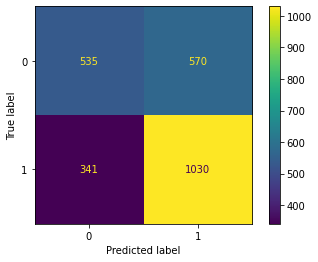

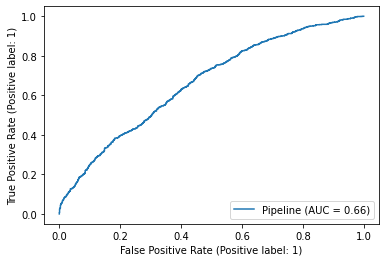

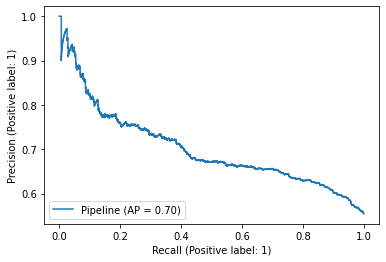

In [ ]:
# final_params = {'gb__learning_rate': 0.001,
#                 'gb__n_estimators': 1000,
#                 'gb__subsample': 1.0,
#                 'gb__criterion': 'friedman_mse',
#                 'gb__min_samples_split': 2,
#                 'gb__min_samples_leaf': 8,
#                 'gb__max_depth': 20,
#                 'gb__min_impurity_decrease': 0.0
#                 }

final_params = {'gb__subsample': 0.8,
                'gb__n_estimators': 800,
                'gb__min_samples_split': 3,
                'gb__min_samples_leaf': 8,
                'gb__min_impurity_decrease': 0.001,
                'gb__max_depth': 9,
                'gb__learning_rate': 0.030888435964774818,
                'gb__criterion': 'friedman_mse'}



pipe.set_params(**final_params)
pipe.fit(X_train, y_train)
# Metrics display
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(pipe, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(pipe, X_test, y_test, pos_label = 1)
plt.show()

##Training on the whole data set and prediction

In [ ]:
final_pred = pipe.predict(model.test_X)
gen_submission_file(final_pred, 'gb_091222_1')

#Ada Boost

## SMOTE - Standard Scaler with Mean Encoding

###Model Set up

In [ ]:
#Initial Set up and basic encoding
model = train_model()
model.custom_encoding()

#Set up pipeline
ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code),
                                             ('MeanEncoder', MeanEncoder(), model.ohe_list_code)], remainder = MeanEncoder())

#ct_trgt = ColumnTransformer(transformers = [('MeanEncoder', MeanEncoder(), slice(0,27))], remainder = 'passthrough')

pipe = imbpipeline(steps = [
                                ('impute', KNNImputer(n_neighbors = 1)), #SimpleImputer(strategy = 'most_frequent')
                                ('sample', SMOTE(random_state = 42)), #
                                ('transform', ct_trgt),
                                ('ad', AdaBoostClassifier(random_state = 42))
                                ])
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(model.train_X, model.train_y, test_size = 0.3, random_state=43)




###With Clustering

In [ ]:
#Initial Set up and basic encoding
model = train_model()
model.custom_encoding()
model.imputeAndCluster(cluster = True)
model.genNewFeatures()


#Set up pipeline
ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code),
                                            ('passthrough', 'passthrough', ['cluster', 'visitScore', 'custTypeScore', 'distanceScore', 'foodPrefScore'])],remainder = MeanEncoder())
#, 'visitScore', 'custTypeScore', 'distanceScore', 'foodPrefScore'

#ct_trgt = ColumnTransformer(transformers = [('Mean Encoder', MeanEncoder(),slice(0,29))])

#ct_trgt = ColumnTransformer(transformers = [('passthrough', 'passthrough', ['cluster'])], remainder = MeanEncoder())

#ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code)], remainder = OneHotEncoder())

pipe = imbpipeline(steps = [
                                #('impute', KNNImputer(n_neighbors = 1)), #SimpleImputer(strategy = 'most_frequent'),
                                ('sample', SMOTE(random_state = 43)), #
                                ('transform', ct_trgt),
                                ('ad', AdaBoostClassifier(random_state=42,))
                                ])
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(model.train_X_imp, model.train_y, test_size = 0.2, random_state=42,)
print(X_train.shape, y_train.shape)

(9903, 33) (9903,)


In [ ]:
X_train.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,cluster,visitScore,foodPrefScore,distanceScore,custTypeScore
1691,48.0,37500.0,0.0,1.0,2.0,2.0,1.0,36.0,0.0,0.0,...,1.0,22.0,1.0,1.0,0.0,2,0.0,0.0,22.0,0.0
8979,48.0,25000.0,3.0,0.0,2.0,3.0,1.0,26.0,1.0,0.0,...,1.0,22.0,0.0,1.0,0.0,4,6.0,0.0,22.0,0.0
123,10.0,37500.0,0.0,1.0,3.0,1.0,4.0,31.0,0.0,0.0,...,2.0,10.0,0.0,0.0,1.0,2,0.0,0.0,0.0,31.0
7038,10.0,50000.0,2.0,0.0,2.0,1.0,3.0,21.0,1.0,0.0,...,2.0,7.0,1.0,2.0,1.0,5,0.0,12.0,14.0,0.0
1952,10.0,50000.0,1.0,1.0,2.0,1.0,2.0,26.0,0.0,0.0,...,2.0,18.0,1.0,1.0,0.0,5,0.0,0.0,18.0,0.0


##GridSearch

0.623363680475809
{'ad__n_estimators': 700, 'ad__base_estimator': RandomForestClassifier(class_weight={0: 0.57, 1: 0.43}, criterion='entropy',
                       max_depth=32, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=400)}
{'mean_fit_time': array([12.27718101, 12.35958786, 11.82255354, 12.11952448]), 'std_fit_time': array([0.62284245, 0.68097632, 0.08637273, 0.51285103]), 'mean_score_time': array([0.51163673, 0.50315671, 0.50976634, 0.52348871]), 'std_score_time': array([0.0091215 , 0.00214129, 0.00498651, 0.03494998]), 'param_ad__n_estimators': masked_array(data=[700, 800, 900, 1000],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_ad__base_estimator': masked_array(data=[RandomForestClassifier(class_weight={0: 0.57, 1: 0.43}, criterion='entropy',
                                          max_depth=32, min_samples_leaf=3, min_samples_split=7,
                                          n_esti

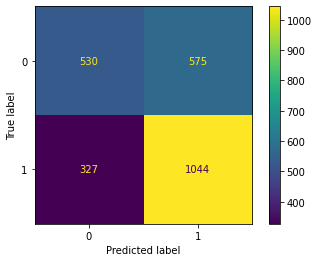

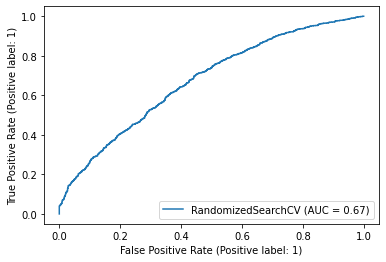

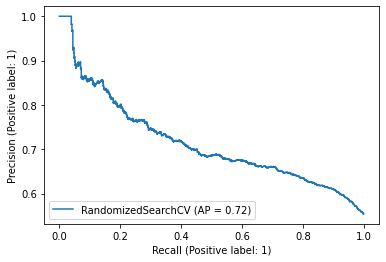

In [ ]:
#GridSearch set up
rf_params =    {'bootstrap': True,
                'class_weight': {0: 0.57, 1: 0.43},
                'criterion': 'entropy',
                'max_depth': 32,
                'max_features': 'auto',
                'max_leaf_nodes': None,
                'min_samples_leaf': 3,
                'min_samples_split': 7,
                'n_estimators': 400}



final_params = {'ad__base_estimator': [RandomForestClassifier(**rf_params)],
                'ad__n_estimators': [700, 800, 900, 1000]#,
                #'ad__learning_rate': 0.0#,
                #'ad__algorithm': 'SAMME.R'
                }

sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.3, random_state = model.random_state)
skf = StratifiedKFold(n_splits = 5,shuffle=True,random_state = 42)
gb_gs = RandomizedSearchCV(estimator = pipe, param_distributions = final_params, scoring = 'f1_weighted', cv = skf, n_iter = 100, return_train_score = True, random_state = 42 )

#Cross fold training
gb_gs.fit(X_train, y_train)

# Metrics display
print(gb_gs.best_score_)
print(gb_gs.best_params_)
print(gb_gs.cv_results_)
print('----------------------------------------------------')
print(gb_gs.score(X_test, y_test))
y_pred = gb_gs.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(gb_gs, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(gb_gs, X_test, y_test, pos_label = 1)
plt.show()


In [ ]:
#GridSearch set up
params = {'rf__n_estimators':[50,100,200], 'rf__criterion': ['gini', 'entropy'], 'rf__max_depth': [None, 5, 10], 'rf__min_samples_split': [2, 5],
          'rf__min_samples_leaf': [1, 5], 'rf__min_impurity_decrease': [0.0, 0.001, 0.01]}
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.3, random_state = model.random_state)
#skf = StratifiedKFold(n_splits = 5,shuffle=True,random_state = 42)
#rf_gs = GridSearchCV(estimator = pipe, param_grid = params, scoring = ['precision', 'recall','f1'], cv = sss, refit = 'f1', return_train_score = True )

#Cross fold training
#rf_gs.fit(model.train_X, model.train_y)

# Metrics display
print(rf_gs.best_score_)
print(rf_gs.best_params_)
print(rf_gs.cv_results_)
print('----------------------------------------------------')
print(rf_gs.score(X_test, y_test))
y_pred = rf_gs.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(rf_gs, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(rf_gs, X_test, y_test, pos_label = 1)
plt.show()



##Evaluating on the Test Data set

0.9989902049883873
0.632875605815832
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      1105
           1       0.64      0.76      0.70      1371

    accuracy                           0.63      2476
   macro avg       0.63      0.62      0.62      2476
weighted avg       0.63      0.63      0.63      2476



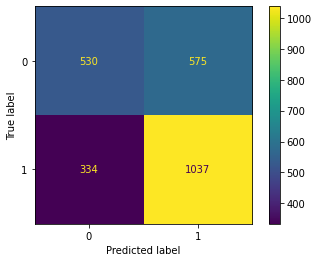

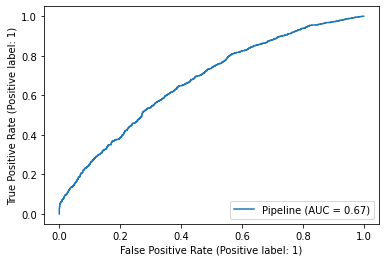

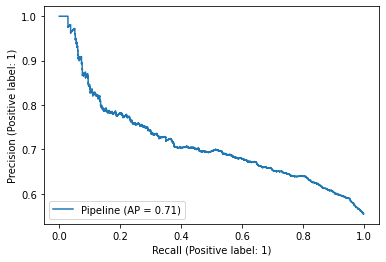

In [ ]:
# rf_params =    {#'criterion': 'gini',
#                 'max_depth': 10,
#                 #'min_impurity_decrease': 0.0,
#                 #'min_samples_leaf': 1,
#                 #'min_samples_split': 2,
#                 'n_estimators': 1000}#,
#                 #'max_features': None}

rf_params =    {'bootstrap': True,
                'class_weight': {0: 0.57, 1: 0.43},
                'criterion': 'entropy',
                'max_depth': 30,
                'max_features': 'auto',
                'max_leaf_nodes': None,
                'min_samples_leaf': 3,
                'min_samples_split': 7,
                'n_estimators': 400}



final_params = {'ad__base_estimator': RandomForestClassifier(**rf_params),
                'ad__n_estimators': 800,
                'ad__learning_rate': 0.1
                #'ad__algorithm': 'SAMME.R'
                }

pipe.set_params(**final_params)
pipe.fit(X_train, y_train)
# Metrics display
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(pipe, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(pipe, X_test, y_test, pos_label = 1)
plt.show()

In [ ]:
(-pipe[-1].feature_importances_).argsort()

array([23, 26, 12,  2,  1,  3, 29,  8,  4, 20,  6, 19, 22, 10, 28, 15, 11,
       27, 30, 21, 18, 31, 13, 32, 16,  7,  0,  9, 25, 24, 17, 14,  5])

In [ ]:
model.train_X_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   offer expiration                      12379 non-null  float64
 1   income_range                          12379 non-null  float64
 2   no_visited_Cold drinks                12379 non-null  float64
 3   travelled_more_than_15mins_for_offer  12379 non-null  float64
 4   Restaur_spend_less_than20             12379 non-null  float64
 5   Marital Status                        12379 non-null  float64
 6   restaurant type                       12379 non-null  float64
 7   age                                   12379 non-null  float64
 8   Prefer western over chinese           12379 non-null  float64
 9   travelled_more_than_25mins_for_offer  12379 non-null  float64
 10  no_visited_bars                       12379 non-null  float64
 11  gender         

##Training on the whole data set and prediction

In [ ]:
final_pred = pipe.predict(model.test_X_imp)
gen_submission_file(final_pred, 'ad-131222-1')

#Neural Networks

## SMOTE - Standard Scaler with Mean Encoding

###Model Set up

In [ ]:
#Initial Set up and basic encoding
model = train_model()
model.custom_encoding()

#Set up pipeline
ct_trgt = ColumnTransformer(transformers = [('StandardScaler', StandardScaler(),model.numeric_list_code),
                                             ('MeanEncoder', MeanEncoder(), model.ohe_list_code)], remainder = 'passthrough')

#ct_trgt = ColumnTransformer(transformers = [('MeanEncoder', MeanEncoder(), slice(0,27))], remainder = 'passthrough')

pipe = imbpipeline(steps = [
                                ('impute', KNNImputer(n_neighbors = 1)), #SimpleImputer(strategy = 'most_frequent')
                                ('sample', SMOTE(random_state = 42)), #
                                ('transform', ct_trgt),
                                ('nn', MLPClassifier(random_state=42))
                                ])
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(model.train_X, model.train_y, test_size = 0.3, random_state=43)




##GridSearch

In [ ]:
#GridSearch set up
params = {'rf__n_estimators':[50,100,200], 'rf__criterion': ['gini', 'entropy'], 'rf__max_depth': [None, 5, 10], 'rf__min_samples_split': [2, 5],
          'rf__min_samples_leaf': [1, 5], 'rf__min_impurity_decrease': [0.0, 0.001, 0.01]}
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.3, random_state = model.random_state)
#skf = StratifiedKFold(n_splits = 5,shuffle=True,random_state = 42)
#rf_gs = GridSearchCV(estimator = pipe, param_grid = params, scoring = ['precision', 'recall','f1'], cv = sss, refit = 'f1', return_train_score = True )

#Cross fold training
#rf_gs.fit(model.train_X, model.train_y)

# Metrics display
print(rf_gs.best_score_)
print(rf_gs.best_params_)
print(rf_gs.cv_results_)
print('----------------------------------------------------')
print(rf_gs.score(X_test, y_test))
y_pred = rf_gs.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(rf_gs, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(rf_gs, X_test, y_test, pos_label = 1)
plt.show()



##Evaluating on the Test Data set

0.6196191575302943
0.5813139472267097
              precision    recall  f1-score   support

           0       0.52      0.57      0.55      1640
           1       0.64      0.59      0.61      2074

    accuracy                           0.58      3714
   macro avg       0.58      0.58      0.58      3714
weighted avg       0.59      0.58      0.58      3714



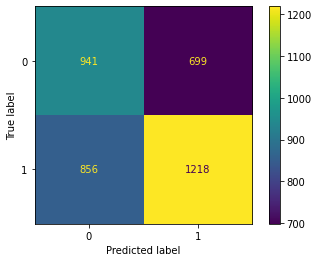

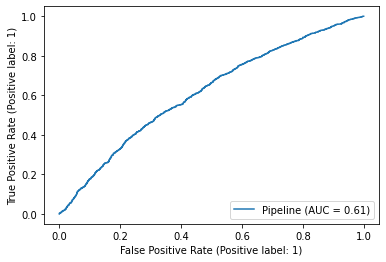

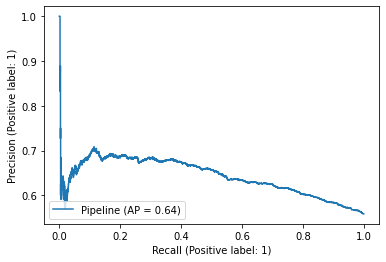

In [ ]:
final_params = {'nn__hidden_layer_sizes': (50,50,50)
                }

pipe.set_params(**final_params)
pipe.fit(X_train, y_train)
# Metrics display
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
RocCurveDisplay.from_estimator(pipe, X_test, y_test, pos_label = 1)
PrecisionRecallDisplay.from_estimator(pipe, X_test, y_test, pos_label = 1)
plt.show()

##Training on the whole data set and prediction

In [ ]:
final_pred = pipe.predict(model.test_X)
gen_submission_file(final_pred, 'nn')

#K Means Clustering

1


<Figure size 2160x2160 with 0 Axes>

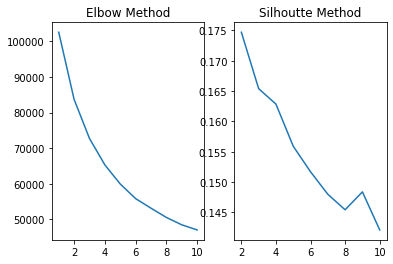

2


<Figure size 2160x2160 with 0 Axes>

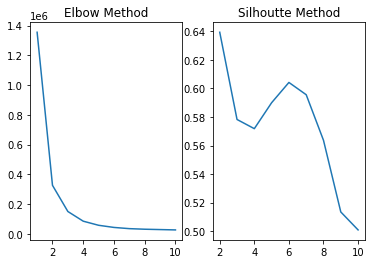

3


<Figure size 2160x2160 with 0 Axes>

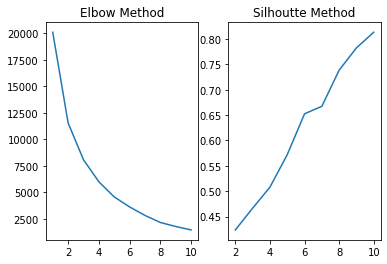

4


<Figure size 2160x2160 with 0 Axes>

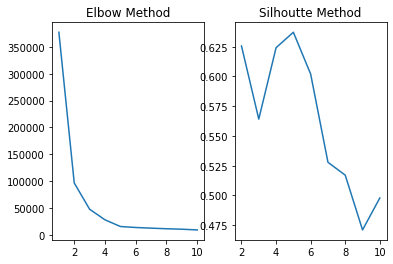

In [ ]:
foodPrefList = ['no_visited_Cold drinks', 'restaurant type',  'Prefer western over chinese',  'no_visited_bars',  'is foodie',
                'no_Take-aways',  'visit restaurant with rating (avg)',  'Prefer home food'] # 3 Elbow & 6 Silhoutte
customerTypeList= [ 'Marital Status',  'gender',  'Cooks regularly',  'Customer type',  'has Children', 'age'] # 3 Elbow
spendBehaviourList = [ 'Restaur_spend_less_than20',  'Restaur_spend_greater_than20']
distanceList = [ 'travelled_more_than_15mins_for_offer',  'travelled_more_than_25mins_for_offer', 'restuarant_same_direction_house',
                  'restuarant_opposite_direction_house', 'Travel Time', 'drop location']

consolidatedList = [foodPrefList, customerTypeList, spendBehaviourList, distanceList]
count = 1
from sklearn.metrics import silhouette_score
for k in consolidatedList:
  print(count)
  count +=1
  loss = []
  ss = []
  for i in range(1,11):
    km = KMeans(n_clusters = i)
    knn = KNNImputer(n_neighbors=1)
    X_imp = knn.fit_transform(model.train_X[k])
    km.fit(X_imp)
    loss.append(km.inertia_)
    if (i > 1):
      ss.append(silhouette_score(X_imp, km.labels_))


  plt.figure(figsize=(30,30))
  fig , ax = plt.subplots(1,2)
  ax[0].plot(range(1,11), loss)
  ax[0].set_title('Elbow Method')
  ax[1].plot(range(2,11), ss)
  ax[1].set_title('Silhoutte Method')
  plt.show()

In [ ]:
km = KMeans(n_clusters = 9)
knn = KNNImputer(n_neighbors=1)
X_imp = knn.fit_transform(model.train_X)
y_cluster = km.fit_predict(X_imp)
print(y_cluster.shape)
np.unique(y_cluster)

(12379,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

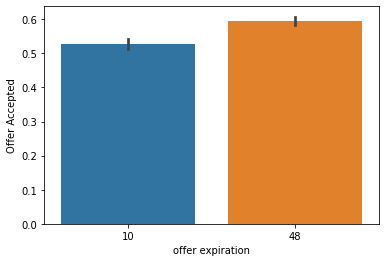

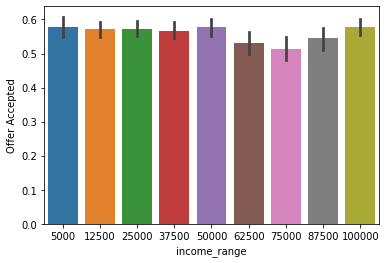

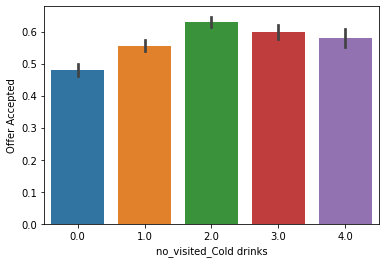

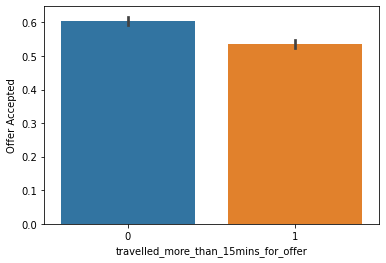

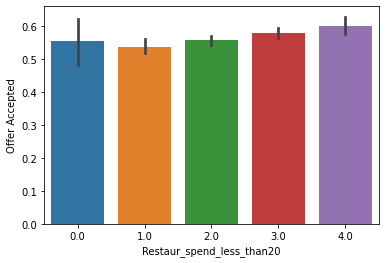

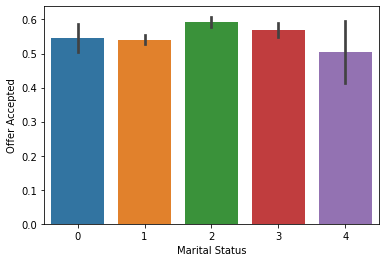

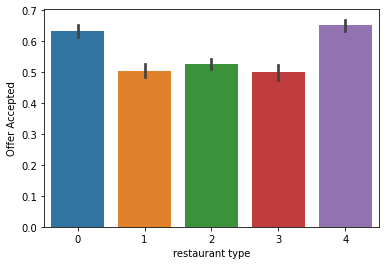

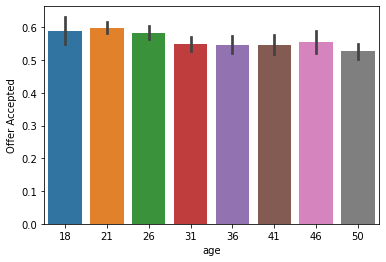

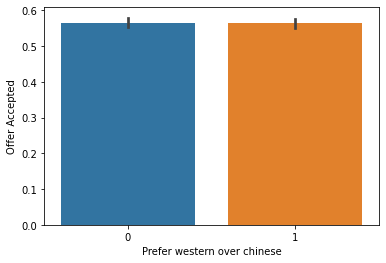

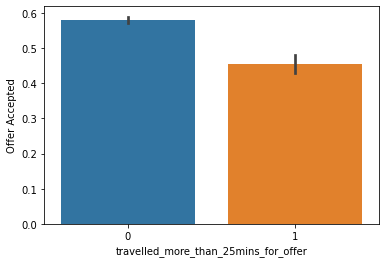

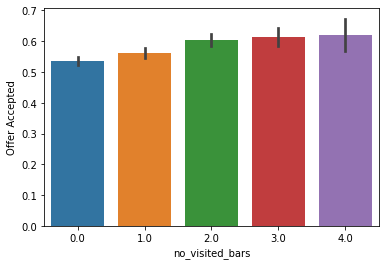

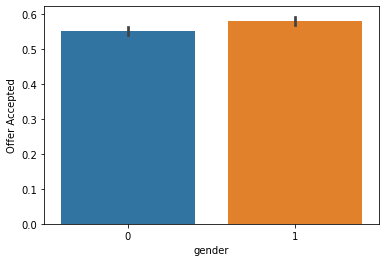

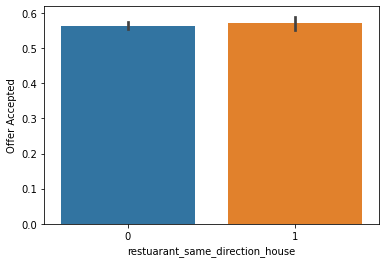

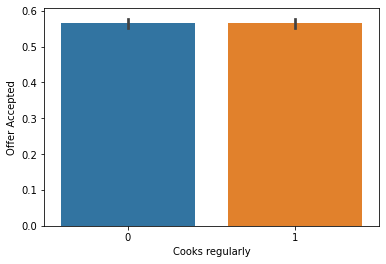

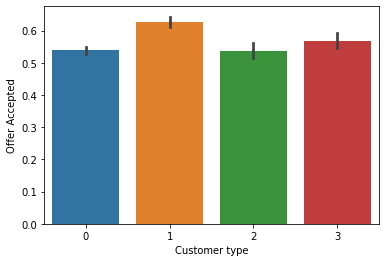

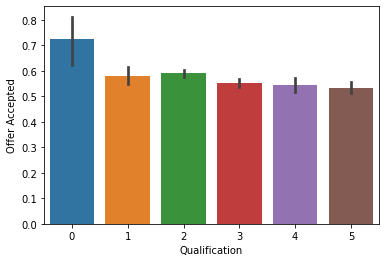

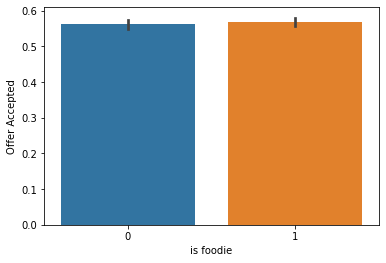

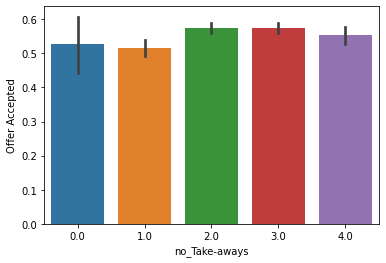

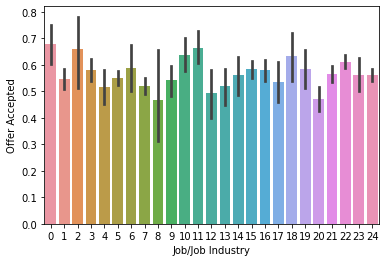

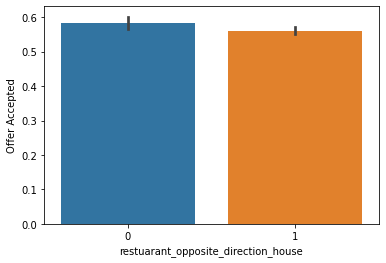

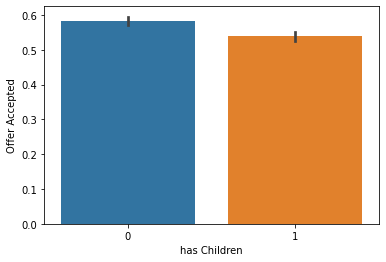

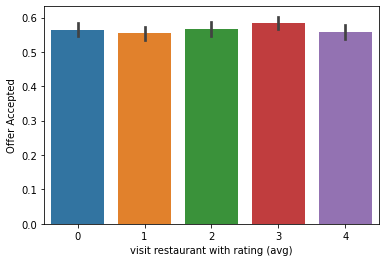

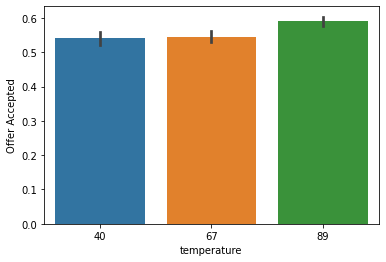

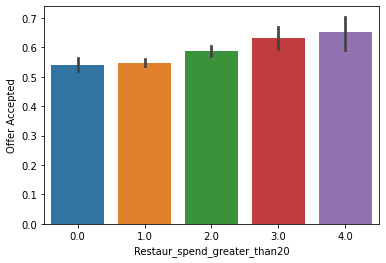

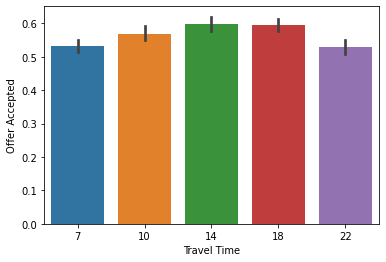

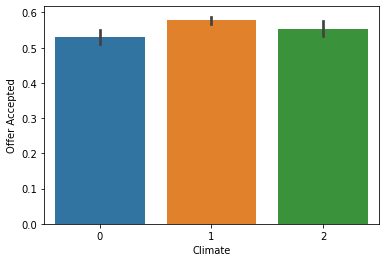

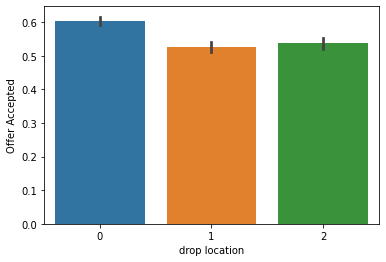

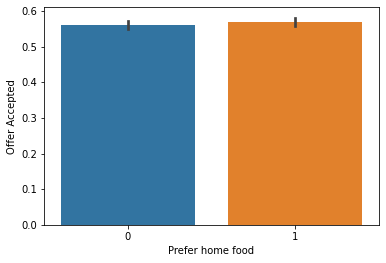

In [ ]:
for i in model.train_X.columns:
  g = sns.barplot(x = i, y = model.train_y, data = model.train_X)
  plt.show()

In [ ]:
4+3%5

7

In [ ]:
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [ ]:
import datetime
4 + '3'

TypeError: ignored

In [ ]:
example = 'helle'
example.rfind('e')

4

In [ ]:
k=complex(2,3)

In [ ]:
k

(2+3j)

In [ ]:
x = int(43.55+2/2)
x

44

In [ ]:
import itertools
l1 = (1,2,3)
l2 = [4,5,6]
l = itertools.chain(l1,l2)
print(next(l1))

TypeError: ignored

In [ ]:
import datetime
d = datetime.date(2017,7,24)
print(d)

2017-07-24


In [ ]:
print('x\97\x98')

x\97
